In [3]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [4]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [5]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [6]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [7]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [8]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [9]:
store.close()
store_repeat.close()

In [10]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [11]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line'")['biosample_term_name'].unique()

array(['T47D', 'Daoy', 'HL-60', 'A549', 'RPMI8226', 'K562', 'HeLa-S3',
       'Jurkat', 'Caki2', 'KBM-7', 'Karpas-422', 'GM06990', 'NCI-H226',
       'GM12878', 'HCT116', 'MG63', 'HS-27A', 'HS-5', 'BE2C', 'WI38',
       'HepG2', 'M059J', 'WERI-Rb-1', 'MCF-7', 'LHCN-M2',
       'LNCaP clone FGC', 'PC-9', 'RCC 7860', 'DND-41', 'MM.1S', 'GM12864',
       'CMK', 'GM12865', 'OCI-LY7', 'HT-29', 'Panc1', 'A673', 'SK-N-SH',
       'G401', 'ACHN', 'Loucy', 'SK-N-MC', 'NAMALWA', 'SJSA1', 'NT2/D1',
       'RPMI-7951', 'PC-3', 'NB4', 'Caco-2', 'A172'], dtype=object)

In [12]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'K562' & method=='H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
170,ENCSR903CEC,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for K562,[],3,"August, 2016",[],/organisms/human/,[],ENCFF250DSF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
204,ENCSR219XCK,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for L...,[],3,"August, 2016",[],/organisms/human/,[],ENCFF371JNQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac


In [13]:
encode_bed = BedTool("../download/ENCODE/ENCSR903CEC/files/ENCFF250DSF/ENCFF250DSF.bed.gz")

In [14]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_Alu_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [15]:
encode_bed.head()

chr7	106206757	106212313	Distal-Prediction-1	1	.	106207512	106212313	255,205,0
 chr2	33141168	33141802	Distal-Prediction-2	1	.	33141168	33141802	255,205,0
 chr19	52047589	52056214	Distal-Prediction-3	1	.	52048957	52053741	255,205,0
 chr6	159273426	159276316	Distal-Prediction-4	1	.	159273426	159276316	255,205,0
 chr10	74078831	74083775	Distal-Prediction-5	1	.	74079445	74083775	255,205,0
 chr18	3620903	3627615	Distal-Prediction-6	1	.	3620903	3626780	255,205,0
 chr1	26447785	26455587	Distal-Prediction-7	1	.	26450850	26455587	255,205,0
 chr11	75244071	75250880	Distal-Prediction-8	1	.	75244560	75246987	255,205,0
 chr1	26945615	26949271	Distal-Prediction-9	1	.	26947061	26948770	255,205,0
 chr1	145454000	145457861	Distal-Prediction-10	1	.	145454000	145457861	255,205,0
 

In [16]:
encode_bed.count()

33082

In [17]:
repeat_bed.count()

1177252

In [18]:
repeat_bed.to_dataframe()['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21'], dtype=object)

In [19]:
encode_bed_df = encode_bed.to_dataframe()

In [20]:
# removing chroms
chroms = encode_bed_df['chrom'].unique()
repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))

In [21]:
repeat_bed.count()

1167465

### Alu size distribution

In [22]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [23]:
# Alu size
repeat_bed_df = repeat_bed.to_dataframe()
repeat_bed_df['size'] = repeat_bed_df.apply(lambda row: compute_size(row), axis=1)

In [24]:
repeat_sizes_df = repeat_bed_df[['size']]

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


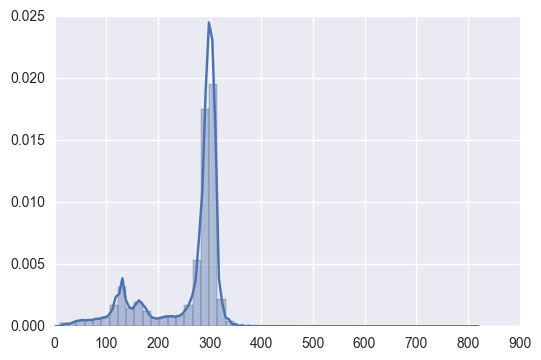

In [25]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(repeat_sizes_df, kde=True)

## Full Alu in enhancer

In [65]:
real_count = encode_bed.intersect(repeat_bed, F=1).count()
real_count

10995

In [27]:
repeat_bed.intersect(encode_bed, f=1).count()

10995

In [28]:
encode_bed.sort().fisher(repeat_bed.sort(), F=1, g=assembly_path)

<FisherOutput at 4816635608>
# Number of query intervals: 33082
# Number of db intervals: 1167465
# Number of overlaps: 10995
# Number of possible intervals (estimated): 1840369
# phyper(10995 - 1, 33082, 1840369 - 33082, 1167465, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 10995        | 22087        |
# not in -a | 1156470      | 650817       |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	0.280

In [29]:
encode_bed.sort().jaccard(repeat_bed.sort(), F=1, g=assembly_path)

{'intersection': 2631241,
 'jaccard': 0.00758184,
 'n_intersections': 10973,
 'union-intersection': 347045099}

### Null Model 1: shuffled enhancers

In [30]:
def compare_null_model(counts, real_count):
    print("mean:", np.mean(counts), "std:", np.std(counts))
    import seaborn as sns
    %matplotlib inline
    import scipy.stats as st
    sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print("z-score:", z_score, "p-value:",p_values)

In [31]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [32]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 14574.97 std: 172.66930561
z-score: -20.7331001149 p-value: 8.70994772635e-96


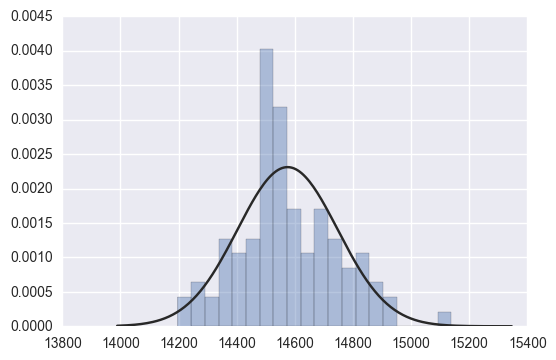

In [33]:
compare_null_model(counts, real_count)

### Null Model 2: shuffled repeats

In [34]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [35]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 14602.01 std: 114.092462065
z-score: -31.6147967598 p-value: 1.15590833719e-219


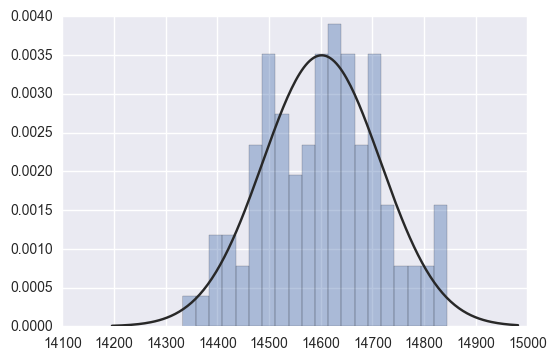

In [36]:
compare_null_model(counts, real_count)

### Null Model 3: shuffled on shuffled

In [37]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [38]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 14599.93 std: 115.273436229
z-score: -31.2728597146 p-value: 5.45868858266e-215


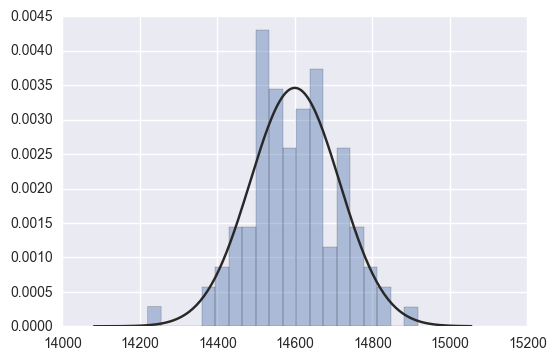

In [39]:
compare_null_model(counts, real_count)

## Counting occurences per enhancer

In [40]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [41]:
overlap_occurences_df = encode_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_2_df = encode_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_null_3_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_complement_df = encode_bed.sort().complement(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()

In [42]:
occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
overlap_occurences_df.columns = occ_cols
overlap_occurences_null_df.columns = occ_cols
overlap_occurences_null_2_df.columns = occ_cols
overlap_occurences_null_3_df.columns = occ_cols
overlap_occurences_complement_df.columns = ['chrom', 'start', 'end', 'occurences']

In [43]:
occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
occurences_complement = overlap_occurences_complement_df.query("occurences > 0")['occurences'].tolist()

In [44]:
occ_freq, occ_base = np.histogram(occurences, bins=range(1,26))
occ_freq_null, _ = np.histogram(occurences_null, bins=range(1,26))
occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=range(1,26))
occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=range(1,26))
occ_freq_complement, _ = np.histogram(occurences_complement, bins=range(1,26))

occ_ratio = occ_freq / sum(occ_freq)
occ_ratio_null = occ_freq_null / sum(occ_freq_null)
occ_ratio_null_2 = occ_freq_null_2 / sum(occ_freq_null_2)
occ_ratio_null_3 = occ_freq_null_3 / sum(occ_freq_null_3)
occ_ratio_complement = occ_freq_complement / sum(occ_freq_complement)

[None]

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


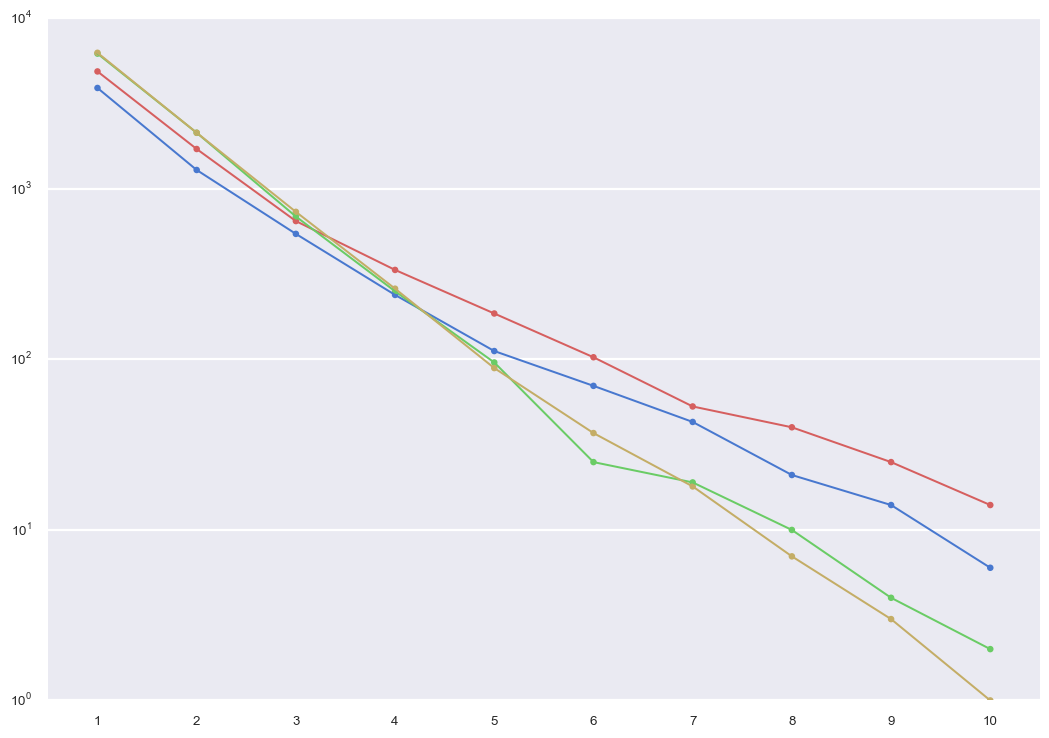

In [45]:
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")
g1 = sns.pointplot(x=occ_base[:10], y=occ_freq[:10], color='b')
g2 = sns.pointplot(x=occ_base[:10], y=occ_freq_null[:10], color='r')
g3 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_2[:10], color='g')
g4 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_3[:10], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
g1.set(yscale='log')

In [46]:
import scipy.stats as st
print(st.expon.fit(occ_freq[:10]))
print(st.expon.fit(occ_freq_null[:10]))
print(st.expon.fit(occ_freq_null_2[:10]))
print(st.expon.fit(occ_freq_null_3[:10]))

(5.9999999999810854, 619.30000415560414)
(13.999999999977749, 786.80005911623766)
(1.999999999990602, 943.00007570431035)
(0.99999999998651301, 956.40000544818349)


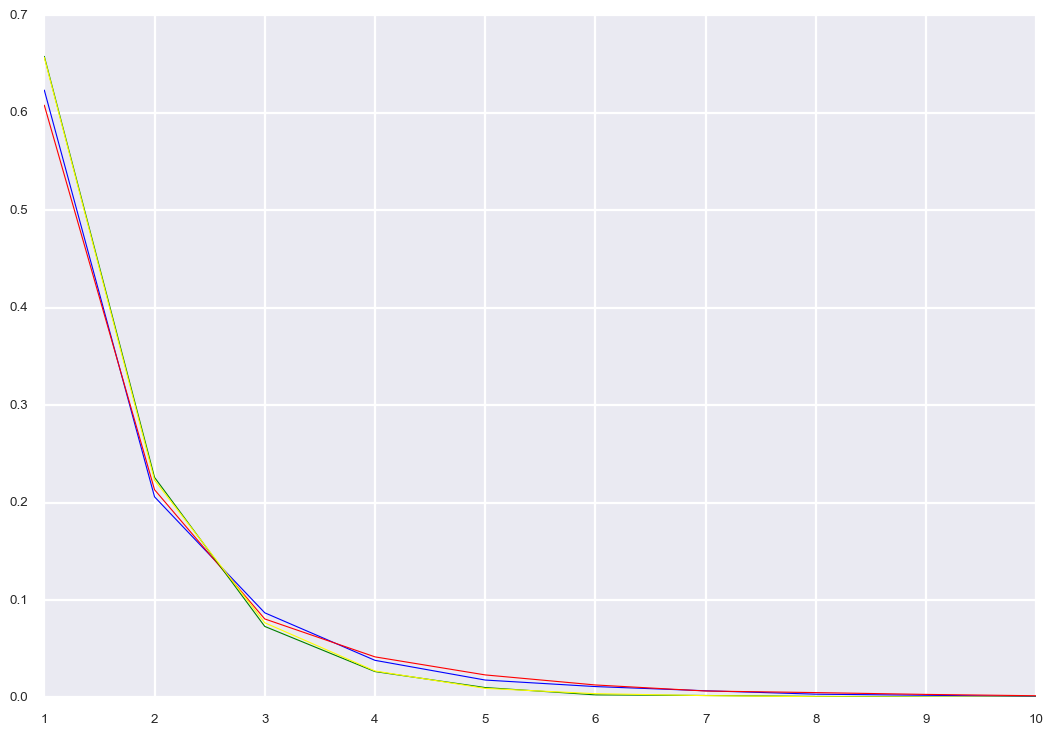

In [47]:
# ratios normalized
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10], c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10], c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10], c='green')
ax = plt.plot(occ_base[:10], occ_ratio_null_3[:10], c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


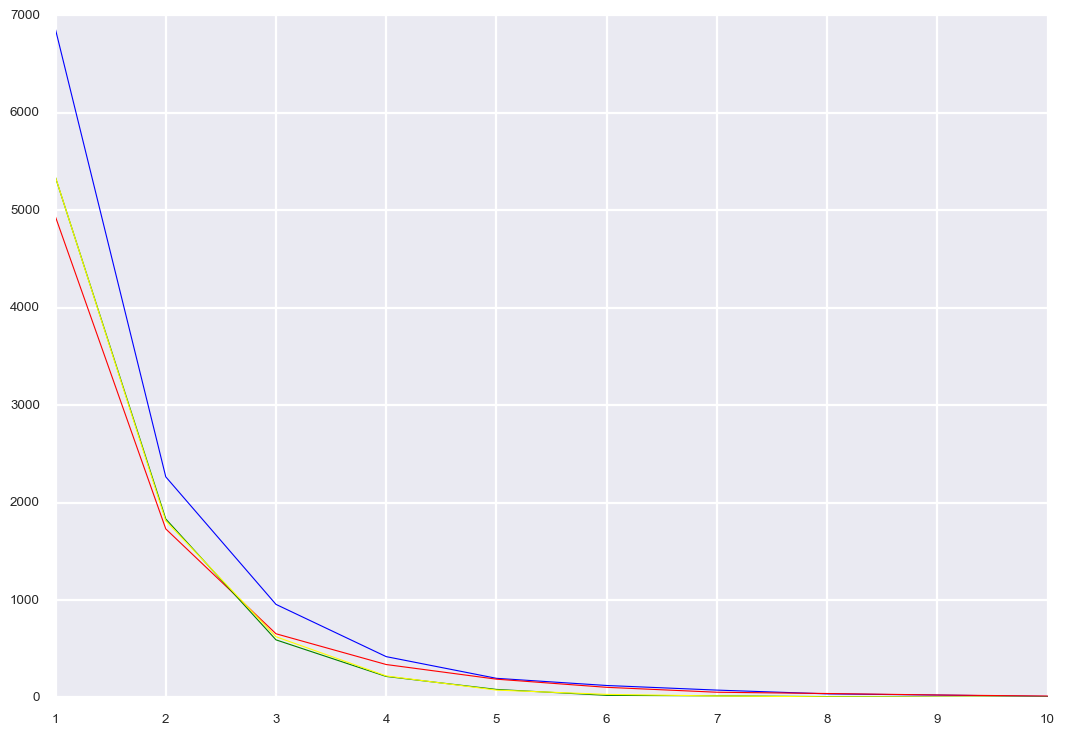

In [48]:
# ratios normalized adjusted (with overlap count)
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10]*real_count, c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10]*8112, c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10]*8108, c='green')
plt.plot(occ_base[:10], occ_ratio_null_3[:10]*8125, c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


## Closeness distribution

In [49]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a', t='all')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [50]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [51]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

(-5000, 5000)

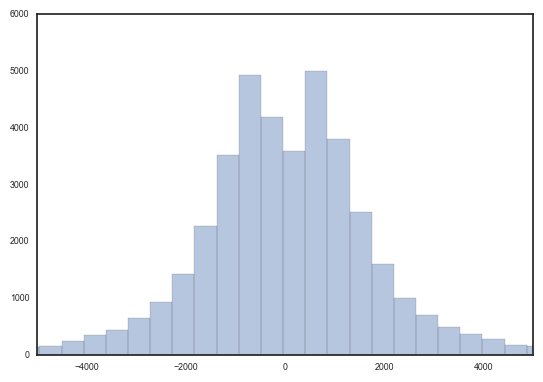

In [76]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-5000, 5000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 1 Closeness

In [53]:
encode_bed_shuffled = encode_bed.shuffle(g=assembly_path)
repeat_closeness_null_df = build_closeness_df(encode_bed_shuffled, repeat_bed)

(-300000, 300000)

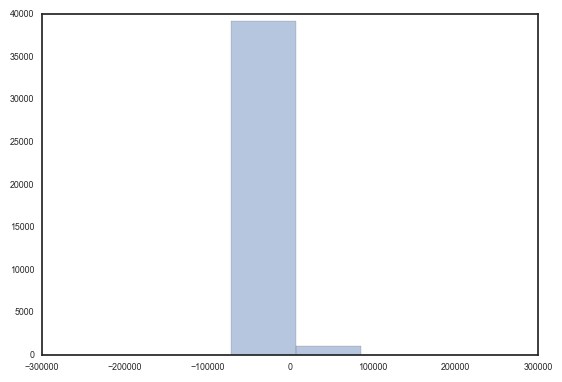

In [67]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 2 Closeness

In [55]:
repeat_bed_shuffled = repeat_bed.shuffle(g=assembly_path)
repeat_closeness_null2_df = build_closeness_df(encode_bed, repeat_bed_shuffled)

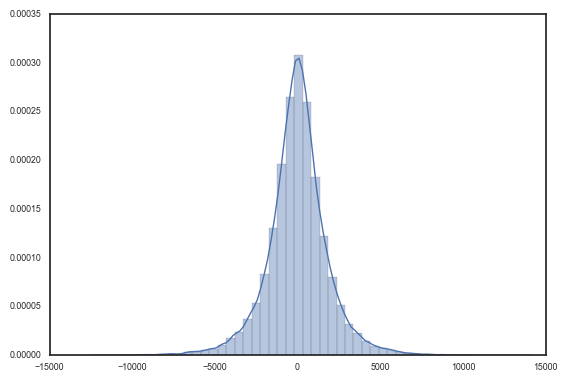

In [56]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null2_df[['centered_distance']], kde=True)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 3 Closeness

In [57]:
repeat_closeness_null3_df = build_closeness_df(encode_bed_shuffled, repeat_bed_shuffled)

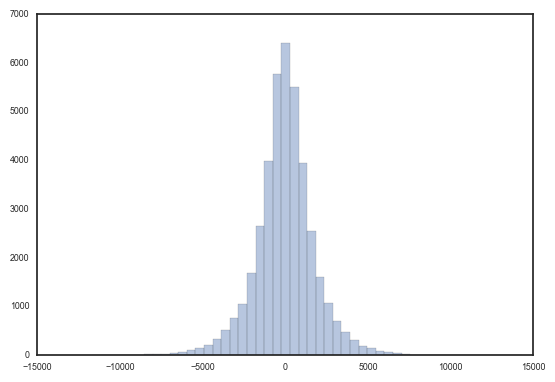

In [58]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null3_df[['centered_distance']], kde=False)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Comparing Closeness Distributions

In [59]:
centered_distance_distribution = repeat_closeness_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null = repeat_closeness_null_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_2 = repeat_closeness_null2_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_3 = repeat_closeness_null3_df.query("centered_distance >=0")['centered_distance']

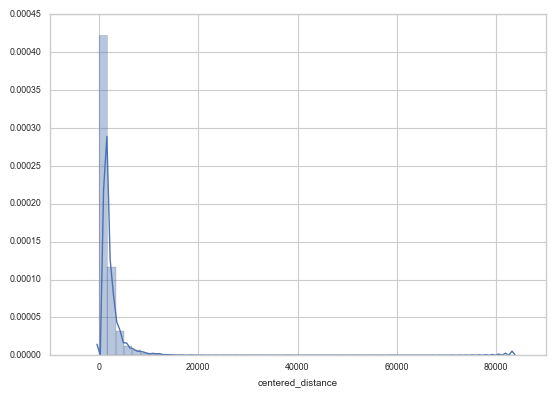

In [60]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(centered_distance_distribution, kde=True)
#g1.set_xlim(0, 10000)

In [77]:
freqs, base = np.histogram(centered_distance_distribution, bins=3000)
freqs_null, base_null = np.histogram(centered_distance_distribution_null, bins=base)
freqs_null_2, base_null_2 = np.histogram(centered_distance_distribution_null_2, bins=base)
freqs_null_3, base_null_3 = np.histogram(centered_distance_distribution_null_3, bins=base)

In [78]:
cumulative = np.cumsum(freqs) /sum(freqs)
cumulative_null = np.cumsum(freqs_null) / sum(freqs_null)
cumulative_null_2 = np.cumsum(freqs_null_2) / sum(freqs_null_2)
cumulative_null_3 = np.cumsum(freqs_null_3) / sum(freqs_null_3)

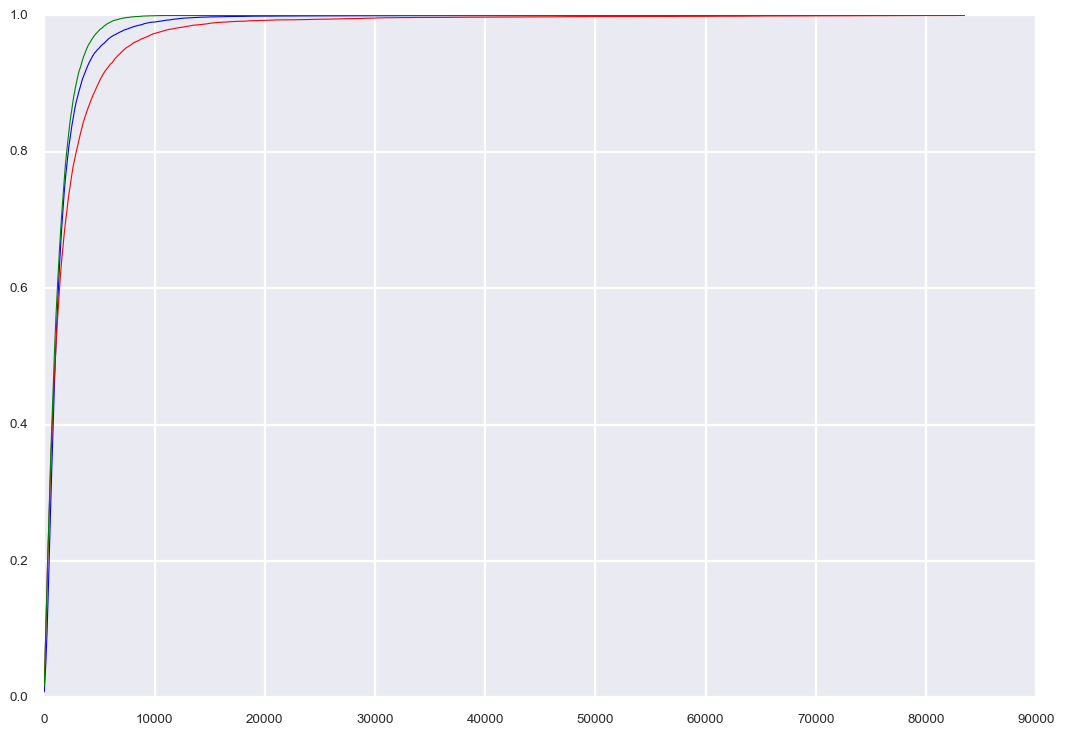

In [79]:
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")

plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_null[:-1], cumulative_null, c='red')
plt.plot(base_null_2[:-1], cumulative_null_2, c='green')
#plt.plot(base_null_3[:-1], cumulative_null_3, c='yellow')
plt.show()


## MIR-enhancers: core of enhancers in MIR

In [ ]:
def compute_centers(df):
    df['centered_locus'] = round(
        (df['end'] - df['start'])/2 
        + df['start']).astype(int)

In [ ]:
compute_centers(encode_bed_df)

In [ ]:
encode_bed_cores_df = encode_bed_df.copy()
encode_bed_cores_df['start'] = encode_bed_cores_df['centered_locus']
encode_bed_cores_df['end'] = encode_bed_cores_df['centered_locus']

In [ ]:
encode_bed_cores_df['chrom'].unique()

In [ ]:
encode_bed_cores = BedTool().from_dataframe(encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [ ]:
encode_bed_cores.count()

In [ ]:
#MIR-enhancers: core of enhancer in MIR
core_intersection = encode_bed_cores.intersect(repeat_bed, f=1)

In [ ]:
core_intersection.sort().merge().count()

In [ ]:
core_intersection.head()

In [ ]:
counts = []
for i in range(0,20):
    shuffled_encode_bed = encode_bed.shuffle(g=assembly_path)
    shuffled_encode_bed_df = shuffled_encode_bed.to_dataframe()
    compute_centers(shuffled_encode_bed_df)
    shuffled_encode_bed_cores_df = shuffled_encode_bed_df.copy()
    shuffled_encode_bed_cores_df['start'] = shuffled_encode_bed_cores_df['centered_locus']
    shuffled_encode_bed_cores_df['end'] = shuffled_encode_bed_cores_df['centered_locus']
    shuffled_encode_bed_cores_all = BedTool().from_dataframe(shuffled_encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])
    core_null_model_intersection_all = shuffled_encode_bed_cores_all.intersect(repeat_bed)
    counts.append(core_null_model_intersection_all.count())

In [ ]:
print(np.mean(counts), np.std(counts))

In [ ]:
z_score =(core_intersection.count() - np.mean(counts))/np.std(counts)
print(z_score)

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
# null model MIR-enhancers
shuffled_encode_bed_cores = encode_bed_cores.shuffle(g=assembly_path)
core_null_model_intersection = shuffled_encode_bed_cores.intersect(repeat_bed, f=1)

In [ ]:
core_null_model_intersection.sort().merge().count()

In [ ]:
def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num,
                                  g=assembly)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed.shuffle(g=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap_cores(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed.shuffle(g=assembly_path, chrom=False)
    random_bed_df = random_bed.to_dataframe()
    compute_centers(random_bed_df)
    random_bed_cores_df = random_bed_df.copy()
    random_bed_cores_df['start'] = random_bed_cores_df['centered_locus']
    random_bed_cores_df['end'] = random_bed_cores_df['centered_locus']
    random_bed_cores = BedTool().from_dataframe(random_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

    row_array = [idx, bed.intersect(random_bed_cores, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)



In [ ]:
from joblib import Parallel, delayed
import multiprocessing

def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, 
                                                    samples_num,strategy='random', compute_cores=False):
    num_cores = multiprocessing.cpu_count()

    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']

    if strategy == 'shuffle':
        if compute_cores == True:
            df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap_cores)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
        else:
            df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                             (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    return pd.concat(df_list)

In [ ]:
test_cores_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 50, 'random', compute_cores=False)

In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_cores_df[['size']], kde=False, fit=st.norm, bins=20)

In [ ]:
np.mean(test_cores_df['size'])

In [ ]:
z_score =(core_intersection.count() - np.mean(test_cores_df['size']))/np.std(test_cores_df['size'])
print(z_score)

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
test_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 1000, 'shuffle')

In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df[['size']], kde=False, fit=st.norm, bins=20)

In [ ]:
np.mean(test_df['size'])

In [ ]:
np.std(test_df['size'])

In [ ]:
z_score =(core_intersection.count() - np.mean(test_df['size']))/np.std(test_df['size'])
print(z_score)

In [ ]:
st.norm.ppf(0.975)

In [ ]:
import scipy.stats as st
st.norm.ppf(.975)
st.norm.cdf(z_score)

In [ ]:
(1- st.norm.cdf(z_score))*100

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
st.ttest_1samp(a= test_df[['size']], popmean=core_intersection.count())

In [ ]:
st.ttest_1samp(a= test_df[['size']], popmean= np.mean(test_df[['size']]))

In [ ]:
random_sizes = test_df[['size']]
random_sizes.reset_index(inplace=True, drop=True)

In [ ]:
chi2, p = st.chisquare(random_sizes, core_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

In [ ]:
encode_bed_cores.sort().fisher(repeat_bed.sort(), f=1e-09, g=assembly_path)

In [ ]:
1-st.hypergeom.cdf(975, 21123880 - 33082, 33082, 593161)

In [ ]:
df_reldist = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.sort()))
df_reldist.T

In [ ]:
df_reldist_random = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.shuffle(g=assembly_path, chrom=False).sort()))

In [ ]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Enhancer-MIRs: MIRs in a +/- 4 kbp window around enhancer's core 

In [ ]:
encode_bed_df = encode_bed.to_dataframe()
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
encode_bed_df['size'].quantile(0.5) == encode_bed_df['size'].median()

In [ ]:
encode_bed_df['size'].std()

In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(encode_bed_df[['size']], kde=True)

In [ ]:
np.percentile(encode_bed_df[['size']], 50)

In [ ]:
np.arange(0, 1, 0.1)

In [ ]:
encode_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
# what if using percentiles in considering enhancer regions? Eg: b=170/2, 251/2, ..., 3123/2
#encode_bed_slop = encode_bed_cores.slop(genome='hg19', b=int(round(3123/2)))

In [ ]:
#compute "enhancers regions" as +/- 4kb from enhancer cores
encode_bed_slop = encode_bed_cores.slop(g=assembly_path, b=4000)

In [ ]:
encode_bed_cores.sort().head()

In [ ]:
encode_bed_slop.sort().head()

In [ ]:
encode_bed_slop.count()

In [ ]:
#enhancer-MIRs: MIR in +/- 4kb from the core of an enhancer 
#(asking the full MIR to be overlapped by an enhancer region)
region_intersection = repeat_bed.intersect(encode_bed_slop, f=1)

In [ ]:
region_intersection.count()

In [ ]:
# null model enhancers-MIRs
shuffled_repeat = repeat_bed.shuffle(g=assembly_path)

In [ ]:
shuffled_repeat.count() == repeat_bed.count()

In [ ]:
null_model_intersection = shuffled_repeat.intersect(encode_bed_slop, f=1)

In [ ]:
null_model_intersection.count()

In [ ]:
test_df2 = create_random_overlap_distribution_parallelized(repeat_bed, encode_bed_slop, assembly_path,
                                                         1, 100)


In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df2[['size']], kde=False, fit=st.norm, bins=10)

In [ ]:
z_score =(region_intersection.count() - np.mean(test_df2['size']))/np.std(test_df2['size'])
print(z_score)

In [ ]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
st.ttest_1samp(a= test_df2[['size']], popmean= region_intersection.count())

In [ ]:
chi2, p = st.chisquare( test_df2[['size']],region_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

In [ ]:
repeat_bed.sort().fisher(encode_bed_slop.sort(), f=1, g=assembly_path)

In [ ]:
#pvalue <- 1-phyper(45, 92, 7518, 1329)
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
1-st.hypergeom.cdf(66741, 0, 594732, 33082)

In [ ]:
df_reldist = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort()))
df_reldist.T

In [ ]:
df_reldist_random = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort().shuffle(g=assembly_path, chrom=False).sort()))

In [ ]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Densities

In [ ]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [ ]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

In [ ]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [ ]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [ ]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [ ]:
len(distal_df)

In [ ]:
len(proximal_df)

In [ ]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

In [ ]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

In [ ]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [ ]:
genes_bed.count()

In [ ]:
genes_bed_df = genes_bed.to_dataframe()

In [ ]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [ ]:
genes_bed_df['chrom'].unique()

In [ ]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [ ]:
genes_bed.count()

In [ ]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

In [ ]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [ ]:
genic_enhancers_bed.count()

In [ ]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [ ]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

In [ ]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [ ]:
non_genic_enhancers_bed.count()

In [ ]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

In [ ]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [ ]:
enhancers_regions_bed.count()

In [ ]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [ ]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)
